epoch 20, x1: -0.943467, x2: -0.000073


d:\Anaconda3\envs\d2l\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


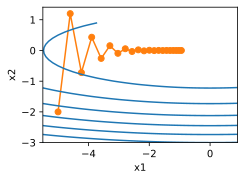

In [2]:
from d2l import torch as d2l


def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

eta = .4
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


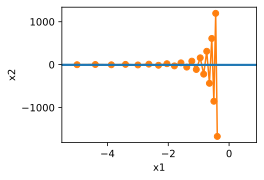

In [3]:
eta = .6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: 0.007188, x2: 0.002553


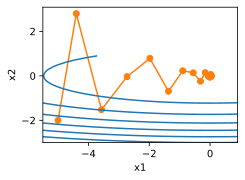

In [4]:
def momentun_2d(x1, x2, v1, v2):
    v1 = beta * v1 + .2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = .6, .5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentun_2d))

epoch 20, x1: -0.126340, x2: -0.186632


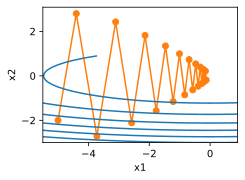

In [5]:
eta, beta = .6, .25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentun_2d))

In [15]:
import torch

def init_momentum_states(feature_dim):
    v_w = torch.zeros(size=(feature_dim, 1))
    v_b = torch.zeros(size=(1,))
    return v_w, v_b

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams["momentum"] * v + p.grad
            p[:] -= hyperparams["lr"] * v
        p.grad.data.zero_()

loss: 0.242, 0.011 sec/epoch


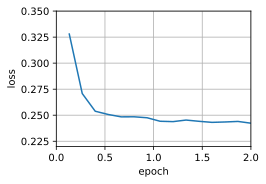

In [16]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim), 
                    {'lr':lr, 'momentum':momentum}, data_iter, feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(.02, .5)

loss: 0.252, 0.011 sec/epoch


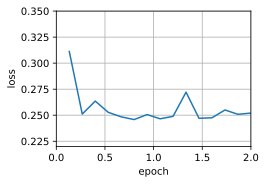

In [18]:
train_momentum(.01, .9)     # momentum变化，相当于有效样本量增加到1 / (1 - momentum)

loss: 0.250, 0.011 sec/epoch


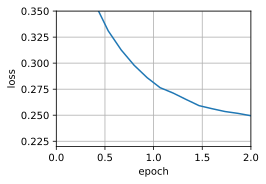

In [19]:
train_momentum(.005, .5)

loss: 0.250, 0.011 sec/epoch


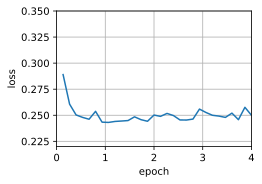

In [20]:
trainer = torch.optim.SGD
d2l.train_concise_ch11(trainer, {'lr':.005, 'momentum': .9}, data_iter)